<a href="https://colab.research.google.com/github/tylee33/Vision_Lecture/blob/main/%5B1week%5DKeras_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

# 1. 라이브러리 불러오기

In [ ]:
# 1.라이브러리 불러오기
import tensorflow as tf # 딥러닝 라이브러리
from tensorflow.python import keras
import numpy as np # 수학 계산 라이브러리
import matplotlib.pyplot as plt # 그래프 그리는 라이브러리 
from tensorflow.keras import utils

# 항상 버전 확인은 필수
print(tf.__version__) # 2.4.0
print(keras.__version__) # 2.4.0

2.8.2
2.6.0


# 2. 랜덤 시드 설정하기 (중요!)
https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

In [ ]:
# 2.랜덤 시드 고정하기
import random
seed_value = 42 # 랜덤 시드 ; 삶, 우주, 그리고 모든 것에 대한 궁극적인 질문에 대한 해답.

random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# 3. 데이터셋

In [ ]:
img_rows = 28
img_cols = 28

def preprocess_data(data, label):
  from keras import backend as K
  if K.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
  else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)

  return (data / 255., (utils.to_categorical(label)))

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)


(60000, 28, 28, 1)


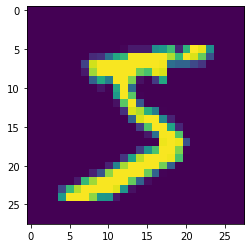

In [ ]:
print(x_train.shape)
plt.imshow(x_train[0,:,:,0])
plt.show()

# 4. 모델 만들기

In [ ]:
# 4.모델 만들기
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28,1)))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# CNN with padding='same', kernel_size=(3,3)
**input = 5x5, output = 5x5** . 

![cnn](https://cdn-media-1.freecodecamp.org/images/d0ufdQE7LHA43cdSrVefw2I9DFceYMixqoZJ)

# CNN with padding=None, kernel_size=(3,3)
**input = 7x7, output = 5x5** . 

![cnn](https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/conv_arithmetic/full_padding_no_strides_transposed.gif)

# MaxPool
![maxPool](http://cs231n.github.io/assets/cnn/maxpool.jpeg)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

# 5. 모델 학습과정 설정하기

In [ ]:
# 5.모델 학습과정 설정하기
# sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
#es =  keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# 6. 모델 학습시키기

In [ ]:
# 6.모델 학습시키기
history = model.fit(x_train, y_train, validation_split=0.2, shuffle=True, epochs=100, batch_size=512, callbacks=[])

Epoch 1/100
94/94 [==============================] - 15s 36ms/step - loss: 2.1157 - accuracy: 0.4579 - val_loss: 1.5941 - val_accuracy: 0.6906
Epoch 2/100
94/94 [==============================] - 3s 30ms/step - loss: 0.8189 - accuracy: 0.8060 - val_loss: 0.4256 - val_accuracy: 0.8817
Epoch 3/100
94/94 [==============================] - 3s 30ms/step - loss: 0.4024 - accuracy: 0.8850 - val_loss: 0.3272 - val_accuracy: 0.9065
Epoch 4/100
94/94 [==============================] - 3s 31ms/step - loss: 0.3350 - accuracy: 0.9025 - val_loss: 0.2938 - val_accuracy: 0.9133
Epoch 5/100
94/94 [==============================] - 3s 31ms/step - loss: 0.3016 - accuracy: 0.9114 - val_loss: 0.2653 - val_accuracy: 0.9248
Epoch 6/100
94/94 [==============================] - 3s 31ms/step - loss: 0.2763 - accuracy: 0.9186 - val_loss: 0.2465 - val_accuracy: 0.9284
Epoch 7/100
94/94 [==============================] - 3s 32ms/step - loss: 0.2558 - accuracy: 0.9242 - val_loss: 0.2310 - val_accuracy: 0.9326
Epoch

# 7.결과 출력

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


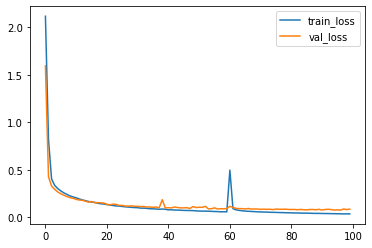

In [ ]:
# Loss 출력

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(('train_loss', 'val_loss'))
plt.show()

#7.결과 출력

In [ ]:
result = model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 1s 3ms/step - loss: 0.0805 - accuracy: 0.9750
[0.080547034740448, 0.9750000238418579]


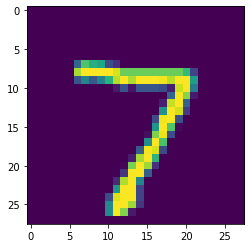

In [ ]:
plt.imshow(x_test[0,:,:,0])

In [ ]:
y_hat = model.predict(x_test[0:1])

In [ ]:
print(y_hat)

[[4.9512470e-09 1.3878067e-08 1.0996112e-06 2.5036166e-04 3.6847494e-13
  6.2157575e-08 2.9602202e-13 9.9974293e-01 3.7750289e-07 5.0759459e-06]]


In [ ]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
np.argmax(y_hat)

7

In [ ]:
np.max(y_hat)

0.9997429